In [1]:
import torch
from torch import nn # (neural network)
import matplotlib.pyplot as plt

In [2]:
# Data - preparing and loading

weight = 0.7
bias = 0.3

start =0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias


In [3]:
# Splitting data into training and testing sets:

train_split = int(0.8* len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:],Y[train_split:]
len(X_train), len(Y_train), len(Y_test), len(X_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

In [5]:
# Build model

class LinearRegressionModel(nn.Module): # Almost everything in python inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [6]:
# PyTorch Model Building Essentials
# torch.nn - contains all of the building blocks for computational graphs/neural networks
# torch.nn.Parameter - what parameters shouild model learn
# torch.nn.Module - Base class for all neural network modules
# torch.optim - This is where optimizers live. They help with gradient descent

In [7]:
# Checking contents of PyTorch Model
# Create a random seed
torch.manual_seed(42)
# Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [10]:
# Making predictions:
# Can also use with torch.no_grad(). This makes it so that we dont spend extra resources changing the gradient.
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

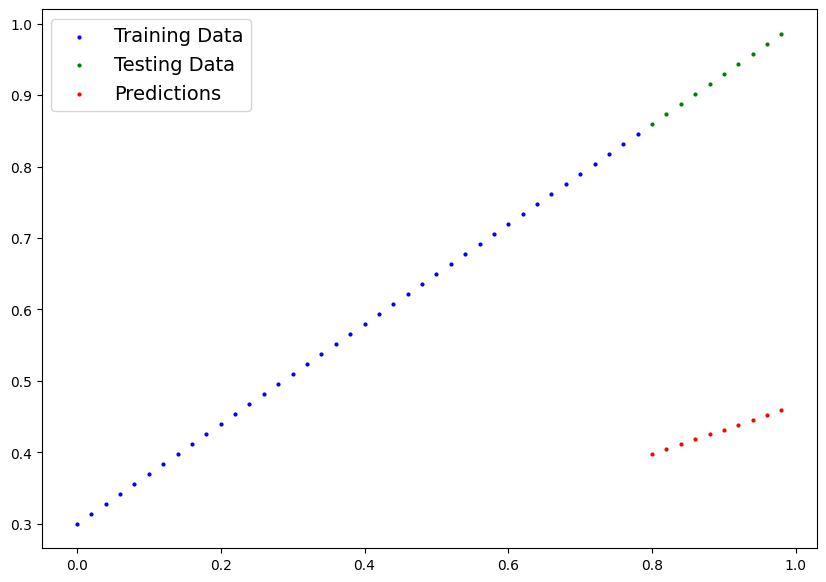

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# Training the Model. Use loss functions to find out how bad your model is
# Optimizer takes in account the loss and adjusts the model's parameters(weight and bias)

model_0.state_dict

<bound method Module.state_dict of LinearRegressionModel()>

In [13]:
# Setup loss function

loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [14]:
loss_fn

L1Loss()

In [15]:
weight, bias

(0.7, 0.3)

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Building a Training Loop

epochs = 300

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Train mode in pytorch sets all parameters that require gradients to true
  # Forward Pass

  y_pred = model_0(X_train)
  # Calculate Loss
  loss = loss_fn(y_pred, Y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()
  # Stop the optimizer(perform gradient descent)
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode(): # turns off gradient tracking
    test_pred = model_0(X_test)

    # Calc loss
    test_loss = loss_fn(test_pred, Y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")






Epoch: 0 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 10 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 20 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 30 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Epoch: 40 | Loss: 0.010716589167714119 | Test Loss: 0.024059748277068138
Epoch: 50 | Loss: 0.0072835334576666355 | Test Loss: 0.016474086791276932
Epoch: 60 | Loss: 0.0038517764769494534 | Test Loss: 0.008201557211577892
Epoch: 70 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 80 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 90 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 100 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 110 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 120 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Epoch: 130 | Loss: 0.008932482451200485 | Test Loss:

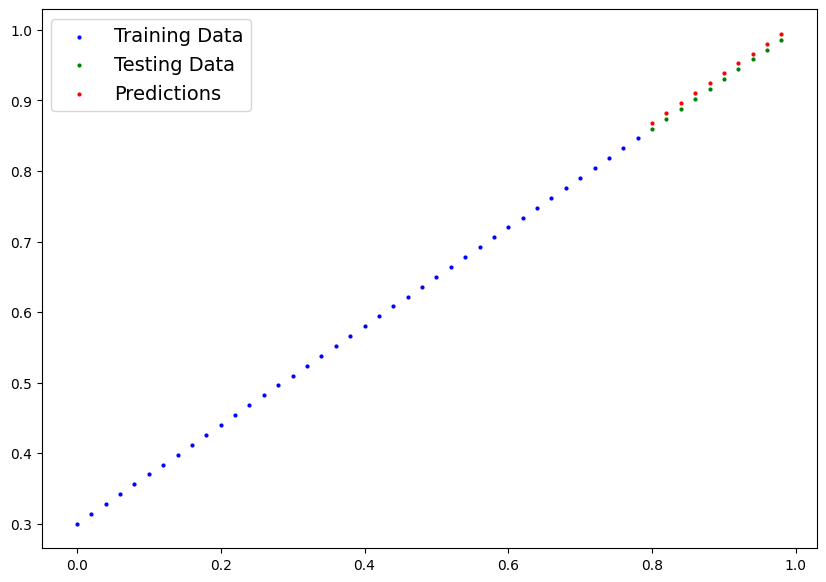

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [23]:
# Saving a model in PyTorch
# torch.save()
# torch.load()
# torch.nn.module.load_state_dict() - allows you to load a model's saved state dictionary

# Saving:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path.
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = f"{MODEL_PATH}/{MODEL_NAME}"

# 3. Save the model state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


In [24]:
# Loading a pytorch model

loaded_model_0 = LinearRegressionModel()

# Load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict(), model_0.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))